In [74]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNet
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate, KFold, train_test_split
from sklearn.pipeline import make_pipeline

In [75]:
df = pd.read_csv('/Users/moskvinanata/Documents/Магистратура/_УРФУ ИИ/Проектный практикум/ObesityDataSet.csv')

# Описание параметров Kagle

Описание параметров с KAGLE

Column Descriptions:  

Gender – Male or Female.  
Age – The person’s age in years.  
Height – Height in meters.  
Weight – Weight in kilograms.  
family_history_with_overweight – Whether the person has a family history of being overweight (yes/no).  

FAVC – If the person frequently consumes high-calorie foods (yes/no).  
FCVC – Frequency of vegetable consumption (scale from 1 to 3).  
NCP – Number of main meals per day.  
CAEC – Frequency of consuming food between meals (Never, Sometimes, Frequently, Always).  

SMOKE – Whether the person smokes (yes/no).  
CH2O – Daily water intake (scale from 1 to 3).  
SCC – If the person monitors their calorie intake (yes/no)  
FAF – Physical activity frequency (scale from 0 to 3).  
TUE – Time spent using technology (scale from 0 to 3).  
CALC – Frequency of alcohol consumption (Never, Sometimes, Frequently, Always).  
MTRANS – Main mode of transportation (Automobile, Bike, Motorbike, Public Transportation, Walking).  

NObeyesdad – Obesity level (Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III).

# Предобработка данных и приведение к нужным форматам

In [76]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [77]:
print("\n=== УНИКАЛЬНЫЕ ЗНАЧЕНИЯ ===")
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"{column}: {unique_count} уникальных значений")
    if unique_count <= 10:  # Показываем значения только если их немного
        print(f"   Значения: {df[column].unique()}")


=== УНИКАЛЬНЫЕ ЗНАЧЕНИЯ ===
Gender: 2 уникальных значений
   Значения: ['Female' 'Male']
Age: 1402 уникальных значений
Height: 1574 уникальных значений
Weight: 1525 уникальных значений
family_history_with_overweight: 2 уникальных значений
   Значения: ['yes' 'no']
FAVC: 2 уникальных значений
   Значения: ['no' 'yes']
FCVC: 810 уникальных значений
NCP: 635 уникальных значений
CAEC: 4 уникальных значений
   Значения: ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE: 2 уникальных значений
   Значения: ['no' 'yes']
CH2O: 1268 уникальных значений
SCC: 2 уникальных значений
   Значения: ['no' 'yes']
FAF: 1190 уникальных значений
TUE: 1129 уникальных значений
CALC: 4 уникальных значений
   Значения: ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS: 5 уникальных значений
   Значения: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad: 7 уникальных значений
   Значения: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 

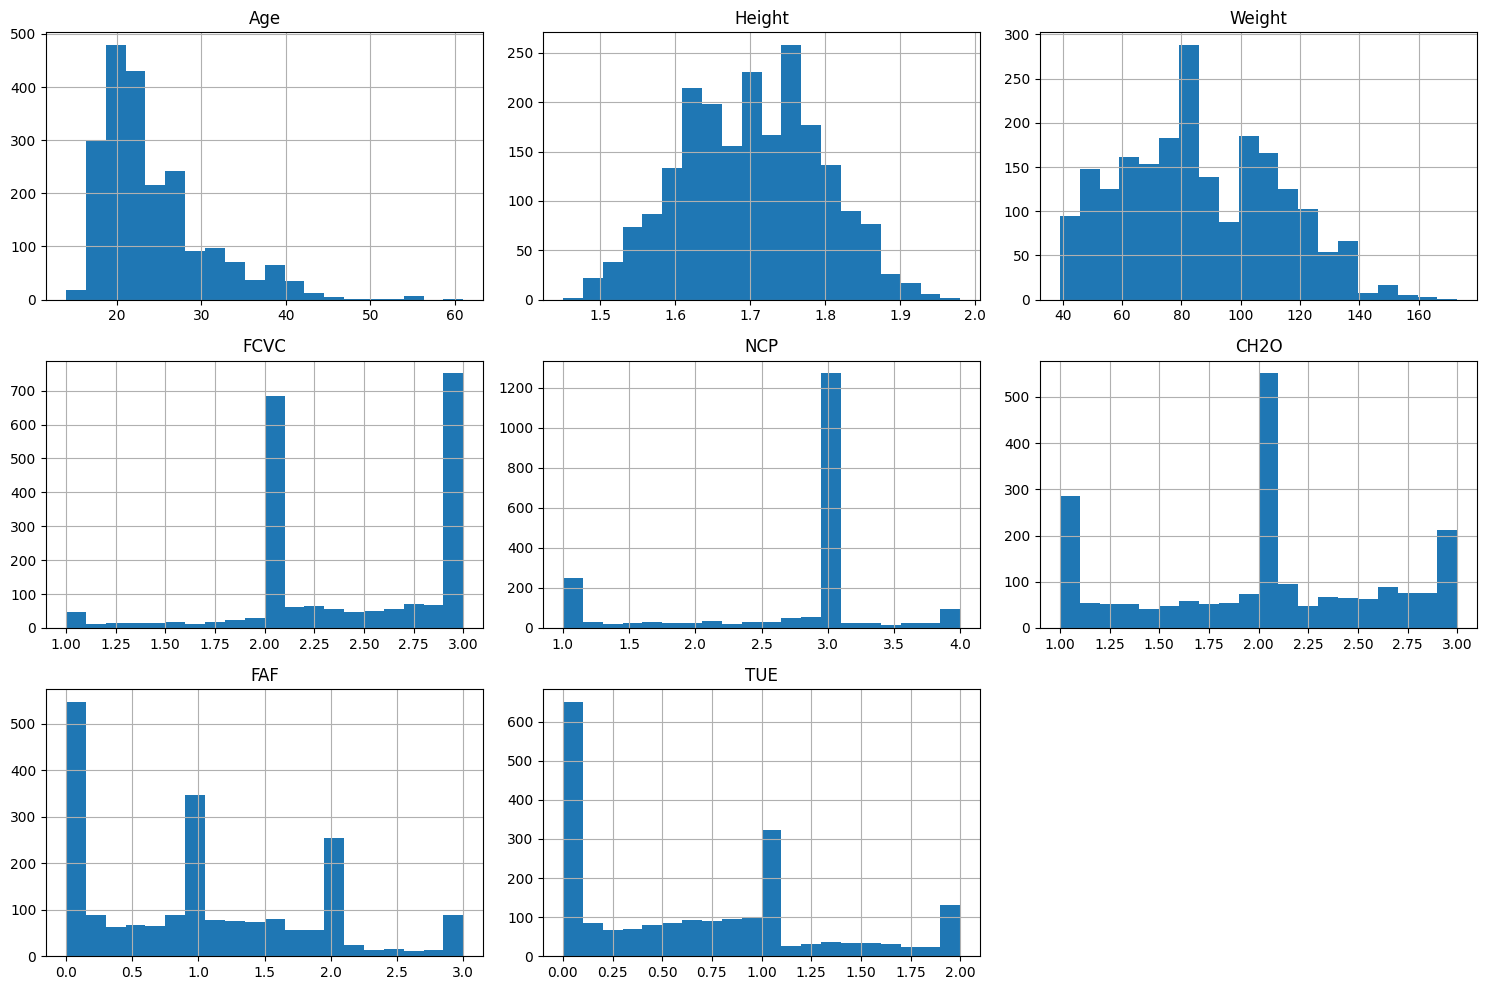

In [78]:
import matplotlib.pyplot as plt

df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

In [79]:
categorical_numeric_features = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

print("Значения ДО округления:")
for col in categorical_numeric_features:
    print(f"{col}: {sorted(df[col].unique())}")

# Округляем каждую колонку до целого числа
for col in categorical_numeric_features:
    df[col] = df[col].round().astype(int)

print("\nЗначения ПОСЛЕ округления:")
for col in categorical_numeric_features:
    print(f"{col}: {sorted(df[col].unique())}")

Значения ДО округления:
FCVC: [np.float64(1.0), np.float64(1.003566), np.float64(1.005578), np.float64(1.00876), np.float64(1.031149), np.float64(1.036159), np.float64(1.036414), np.float64(1.052699), np.float64(1.053534), np.float64(1.063449), np.float64(1.064162), np.float64(1.067909), np.float64(1.078529), np.float64(1.081585), np.float64(1.0816), np.float64(1.096455), np.float64(1.108663), np.float64(1.116068), np.float64(1.118436), np.float64(1.122127), np.float64(1.123672), np.float64(1.123939), np.float64(1.133844), np.float64(1.140615), np.float64(1.142468), np.float64(1.164062), np.float64(1.168856), np.float64(1.188089), np.float64(1.202075), np.float64(1.203754), np.float64(1.204855), np.float64(1.206276), np.float64(1.212908), np.float64(1.21498), np.float64(1.220024), np.float64(1.261288), np.float64(1.263216), np.float64(1.264234), np.float64(1.270448), np.float64(1.276858), np.float64(1.27785), np.float64(1.289315), np.float64(1.303878), np.float64(1.306844), np.float64(

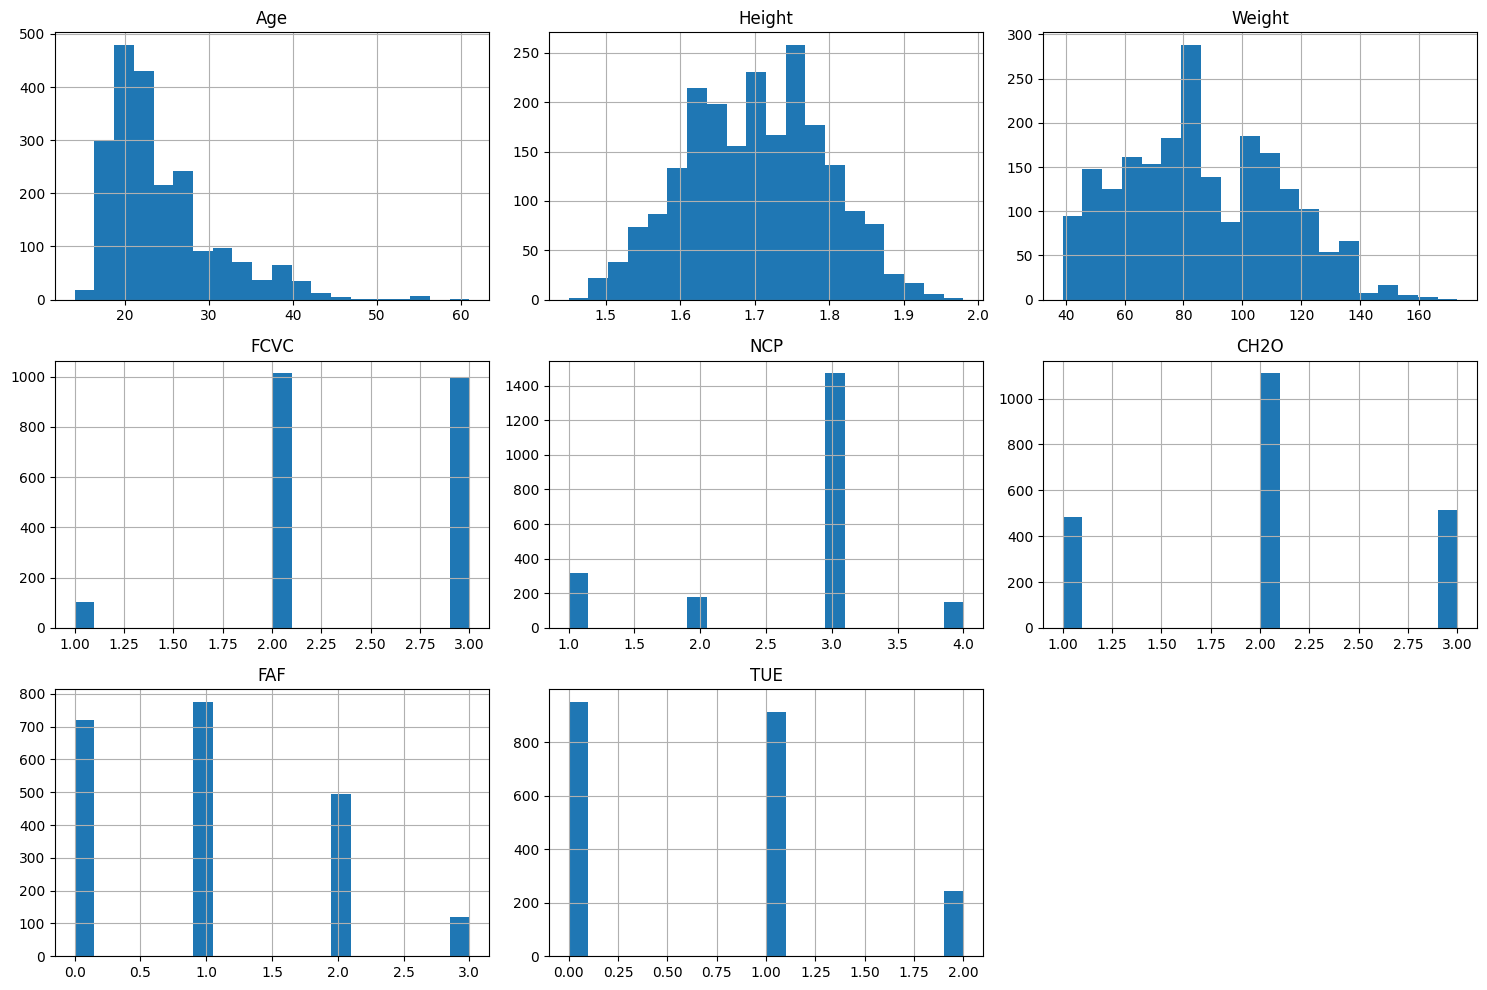

In [80]:
import matplotlib.pyplot as plt

df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

In [81]:
print("\n=== УНИКАЛЬНЫЕ ЗНАЧЕНИЯ ===")
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"{column}: {unique_count} уникальных значений")
    if unique_count <= 10:  # Показываем значения только если их немного
        print(f"   Значения: {df[column].unique()}")


=== УНИКАЛЬНЫЕ ЗНАЧЕНИЯ ===
Gender: 2 уникальных значений
   Значения: ['Female' 'Male']
Age: 1402 уникальных значений
Height: 1574 уникальных значений
Weight: 1525 уникальных значений
family_history_with_overweight: 2 уникальных значений
   Значения: ['yes' 'no']
FAVC: 2 уникальных значений
   Значения: ['no' 'yes']
FCVC: 3 уникальных значений
   Значения: [2 3 1]
NCP: 4 уникальных значений
   Значения: [3 1 4 2]
CAEC: 4 уникальных значений
   Значения: ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE: 2 уникальных значений
   Значения: ['no' 'yes']
CH2O: 3 уникальных значений
   Значения: [2 3 1]
SCC: 2 уникальных значений
   Значения: ['no' 'yes']
FAF: 4 уникальных значений
   Значения: [0 3 2 1]
TUE: 3 уникальных значений
   Значения: [1 0 2]
CALC: 4 уникальных значений
   Значения: ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS: 5 уникальных значений
   Значения: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad: 7 уникальных значений
   Значения: ['No

In [82]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   int64  
 7   NCP                             2111 non-null   int64  
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   int64  
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [83]:
## Сначала преобразуем категориальные переменные в числовые где это имеет смысл

# Преобразуем бинарные переменные
binary_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
binary_mapping = {'no': 0, 'yes': 1, 'Female': 0, 'Male': 1}

for col in binary_columns:
    if col in df.columns:
        df[col] = df[col].map(binary_mapping)

# Преобразуем ординарные переменные с естественным порядком
ordinal_mappings = {
    'FCVC': {1: 1, 2: 2, 3: 3},  # частота овощей
    'NCP': {1: 1, 2: 2, 3: 3, 4: 4},  # количество приемов пищи
    'CAEC': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
    'CH2O': {1: 1, 2: 2, 3: 3},  # потребление воды
    'FAF': {0: 0, 1: 1, 2: 2, 3: 3},  # физическая активность
    'TUE': {0: 0, 1: 1, 2: 2},  # время использования гаджетов
    'CALC': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
    'MTRANS': {'Walking': 1, 'Bike': 2, 'Motorbike': 3, 'Automobile': 4, 'Public_Transportation': 5}
}

for col, mapping in ordinal_mappings.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)

# Целевая переменная (можно закодировать по степени ожирения)
obesity_order = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
df['NObeyesdad'] = df['NObeyesdad'].map(obesity_order)

In [84]:
# 9. Уникальные значения в каждой колонке (особенно полезно для категориальных)
print("\n=== УНИКАЛЬНЫЕ ЗНАЧЕНИЯ ===")
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"{column}: {unique_count} уникальных значений")
    if unique_count <= 10:  # Показываем значения только если их немного
        print(f"   Значения: {df[column].unique()}")


=== УНИКАЛЬНЫЕ ЗНАЧЕНИЯ ===
Gender: 2 уникальных значений
   Значения: [0 1]
Age: 1402 уникальных значений
Height: 1574 уникальных значений
Weight: 1525 уникальных значений
family_history_with_overweight: 2 уникальных значений
   Значения: [1 0]
FAVC: 2 уникальных значений
   Значения: [0 1]
FCVC: 3 уникальных значений
   Значения: [2 3 1]
NCP: 4 уникальных значений
   Значения: [3 1 4 2]
CAEC: 4 уникальных значений
   Значения: [1 2 3 0]
SMOKE: 2 уникальных значений
   Значения: [0 1]
CH2O: 3 уникальных значений
   Значения: [2 3 1]
SCC: 2 уникальных значений
   Значения: [0 1]
FAF: 4 уникальных значений
   Значения: [0 3 2 1]
TUE: 3 уникальных значений
   Значения: [1 0 2]
CALC: 4 уникальных значений
   Значения: [0 1 2 3]
MTRANS: 5 уникальных значений
   Значения: [5 1 4 3 2]
NObeyesdad: 7 уникальных значений
   Значения: [1 2 3 4 0 5 6]


In [85]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   int64  
 7   NCP                             2111 non-null   int64  
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   int64  
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

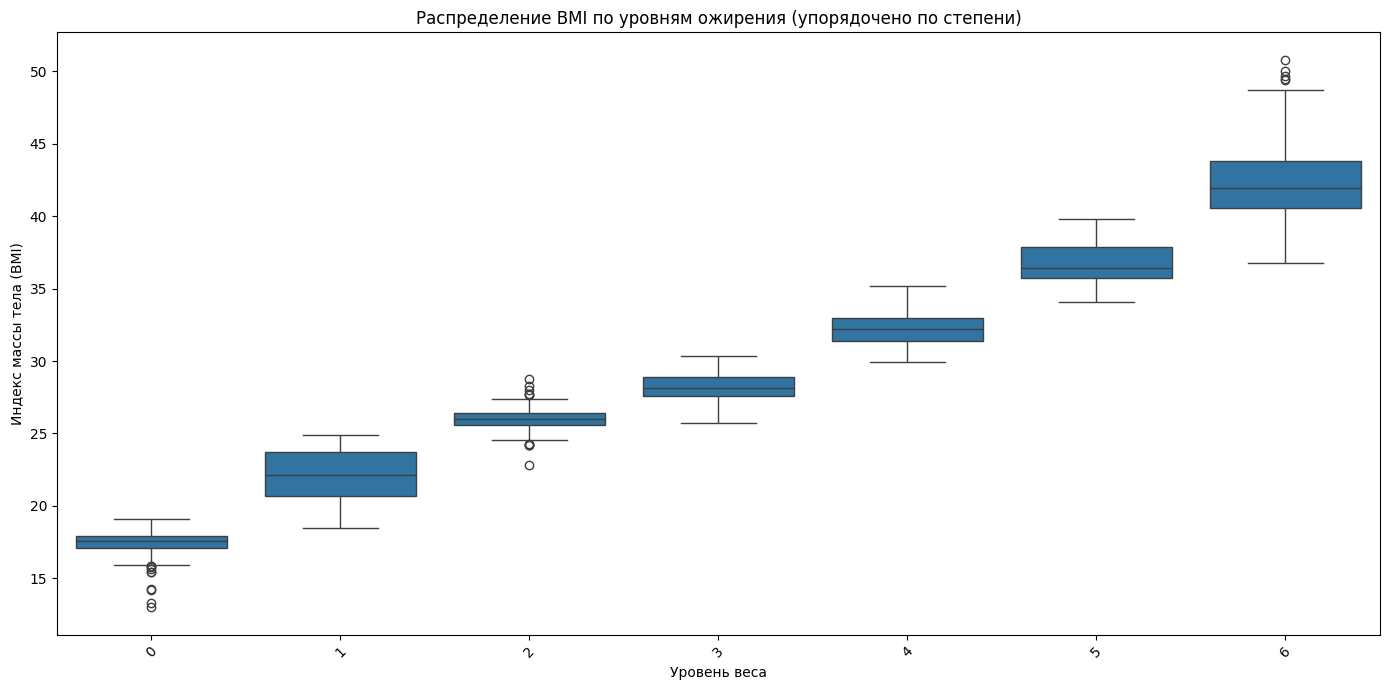

In [88]:
# Создадим BMI (Индекс Массы Тела) для лучшего понимания
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Определяем правильный порядок категорий ожирения по степени
obesity_order = [
    '0',      # Недостаточный вес
    '1',            # Нормальный вес
    '2',       # Избыточный вес I
    '3',      # Избыточный вес II
    '4',           # Ожирение I типа
    '5',          # Ожирение II типа
    '6'          # Ожирение III типа
]

# Стандартные границы BMI по классификации ВОЗ
bmi_boundaries = {
    'Недостаточный вес': 18.5,
    'Нормальный вес': 25,
    'Избыточный вес': 30,
    'Ожирение I': 35,
    'Ожирение II': 40
}

# Распределение BMI по категориям ожирения с упорядочиванием
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='NObeyesdad', y='BMI', order=obesity_order)
plt.xticks(rotation=45)
plt.title('Распределение BMI по уровням ожирения (упорядочено по степени)')
plt.xlabel('Уровень веса')
plt.ylabel('Индекс массы тела (BMI)')
plt.tight_layout()
plt.show()

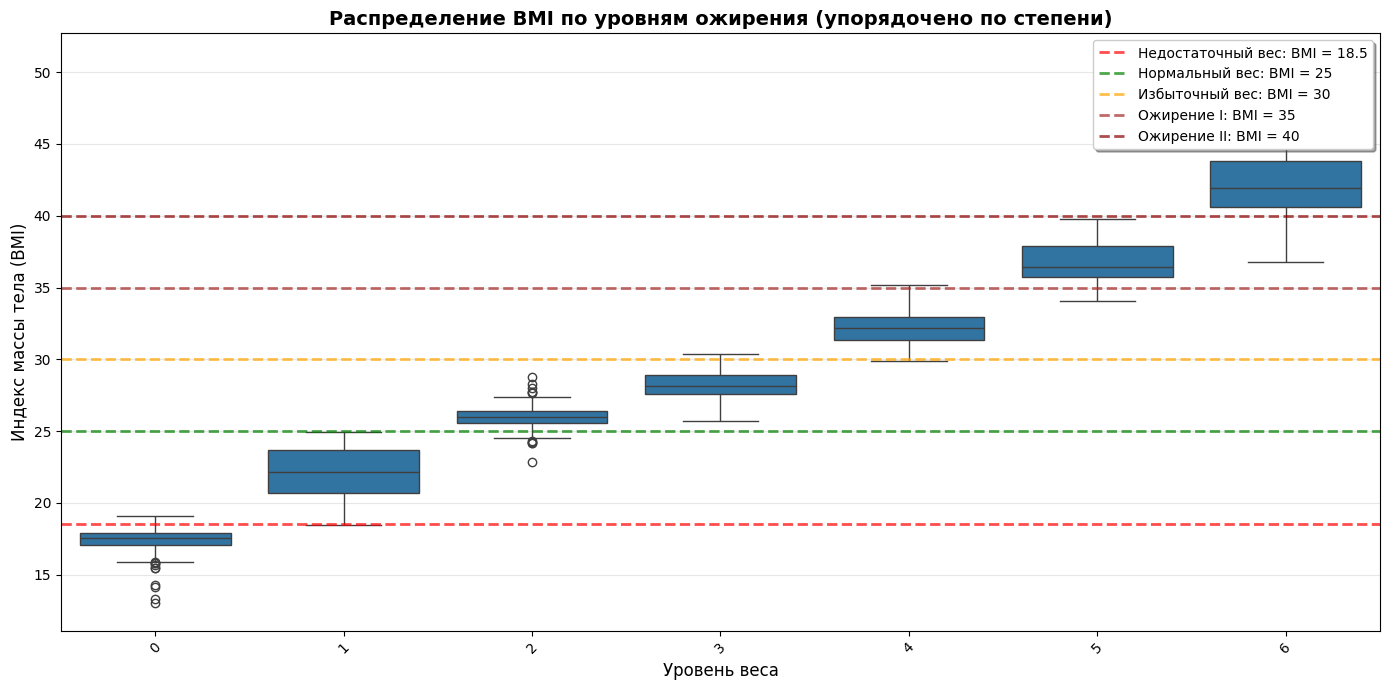


Статистика BMI по категориям:
0                   : mean = nan, min = nan, max = nan
1                   : mean = nan, min = nan, max = nan
2                   : mean = nan, min = nan, max = nan
3                   : mean = nan, min = nan, max = nan
4                   : mean = nan, min = nan, max = nan
5                   : mean = nan, min = nan, max = nan
6                   : mean = nan, min = nan, max = nan


In [89]:
# Создадим BMI (Индекс Массы Тела) для лучшего понимания
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Определяем правильный порядок категорий ожирения по степени
obesity_order = [
    '0',      # Недостаточный вес
    '1',            # Нормальный вес
    '2',       # Избыточный вес I
    '3',      # Избыточный вес II
    '4',           # Ожирение I типа
    '5',          # Ожирение II типа
    '6'          # Ожирение III типа
]

# Стандартные границы BMI по классификации ВОЗ
bmi_boundaries = {
    'Недостаточный вес': 18.5,
    'Нормальный вес': 25,
    'Избыточный вес': 30,
    'Ожирение I': 35,
    'Ожирение II': 40
}

# Распределение BMI по категориям ожирения с упорядочиванием
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='NObeyesdad', y='BMI', order=obesity_order)
plt.xticks(rotation=45)
plt.title('Распределение BMI по уровням ожирения (упорядочено по степени)', fontsize=14, fontweight='bold')

# Добавляем горизонтальные линии границ
colors = ['red', 'green', 'orange', 'brown', 'darkred']
linestyles = ['--', '--', '--', '--', '--']

for i, ((label, value), color, linestyle) in enumerate(zip(bmi_boundaries.items(), colors, linestyles)):
    plt.axhline(y=value, color=color, linestyle=linestyle, alpha=0.7, linewidth=2, 
                label=f'{label}: BMI = {value}')

# Добавляем легенду для линий границ
plt.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)

plt.xlabel('Уровень веса', fontsize=12)
plt.ylabel('Индекс массы тела (BMI)', fontsize=12)

# Добавляем сетку для лучшей читаемости
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Дополнительно: выводим статистику по BMI для каждой категории
print("\nСтатистика BMI по категориям:")
print("=" * 50)
for category in obesity_order:
    bmi_stats = df[df['NObeyesdad'] == category]['BMI'].describe()
    print(f"{category:<20}: mean = {bmi_stats['mean']:.1f}, min = {bmi_stats['min']:.1f}, max = {bmi_stats['max']:.1f}")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   int64  
 7   NCP                             2111 non-null   int64  
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   int64  
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

# Предобработка данных и приведение к нужным форматам завершена ✅

# Изучение корреляции

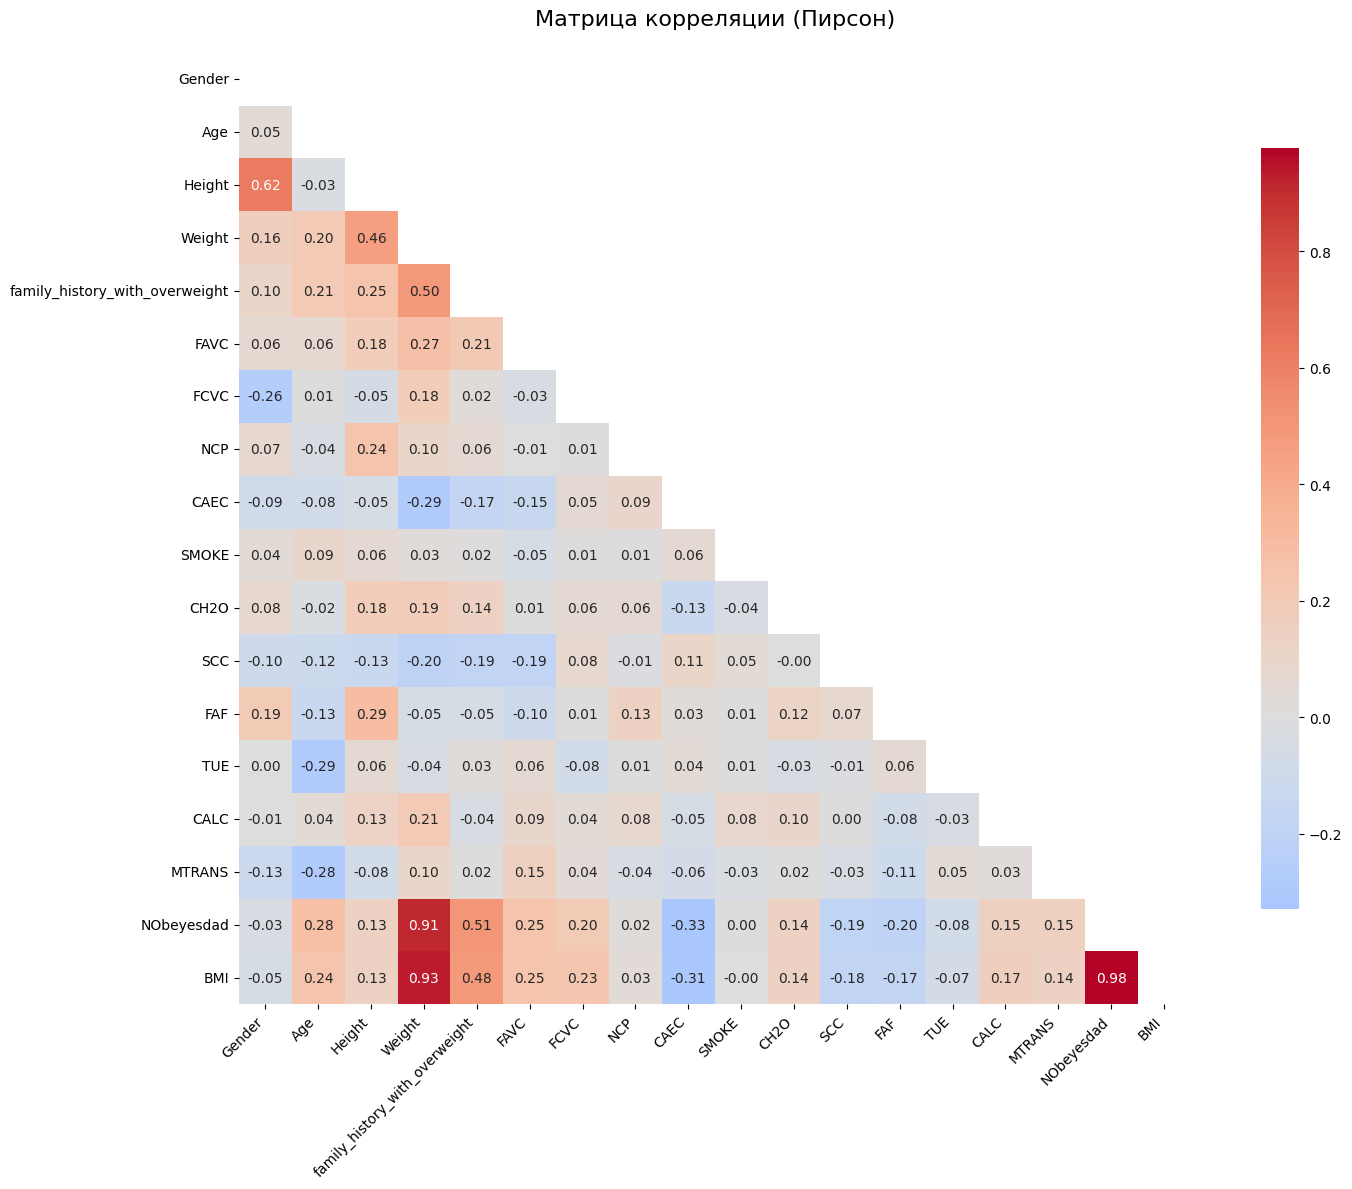

In [90]:
# Строим матрицу корреляции
plt.figure(figsize=(16, 12))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Визуализируем тепловую карту
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Маска для верхнего треугольника

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            center=0,
            square=True,
            cbar_kws={"shrink": .8})

plt.title('Матрица корреляции (Пирсон)', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import spearmanr, pointbiserialr
import scipy.stats as stats

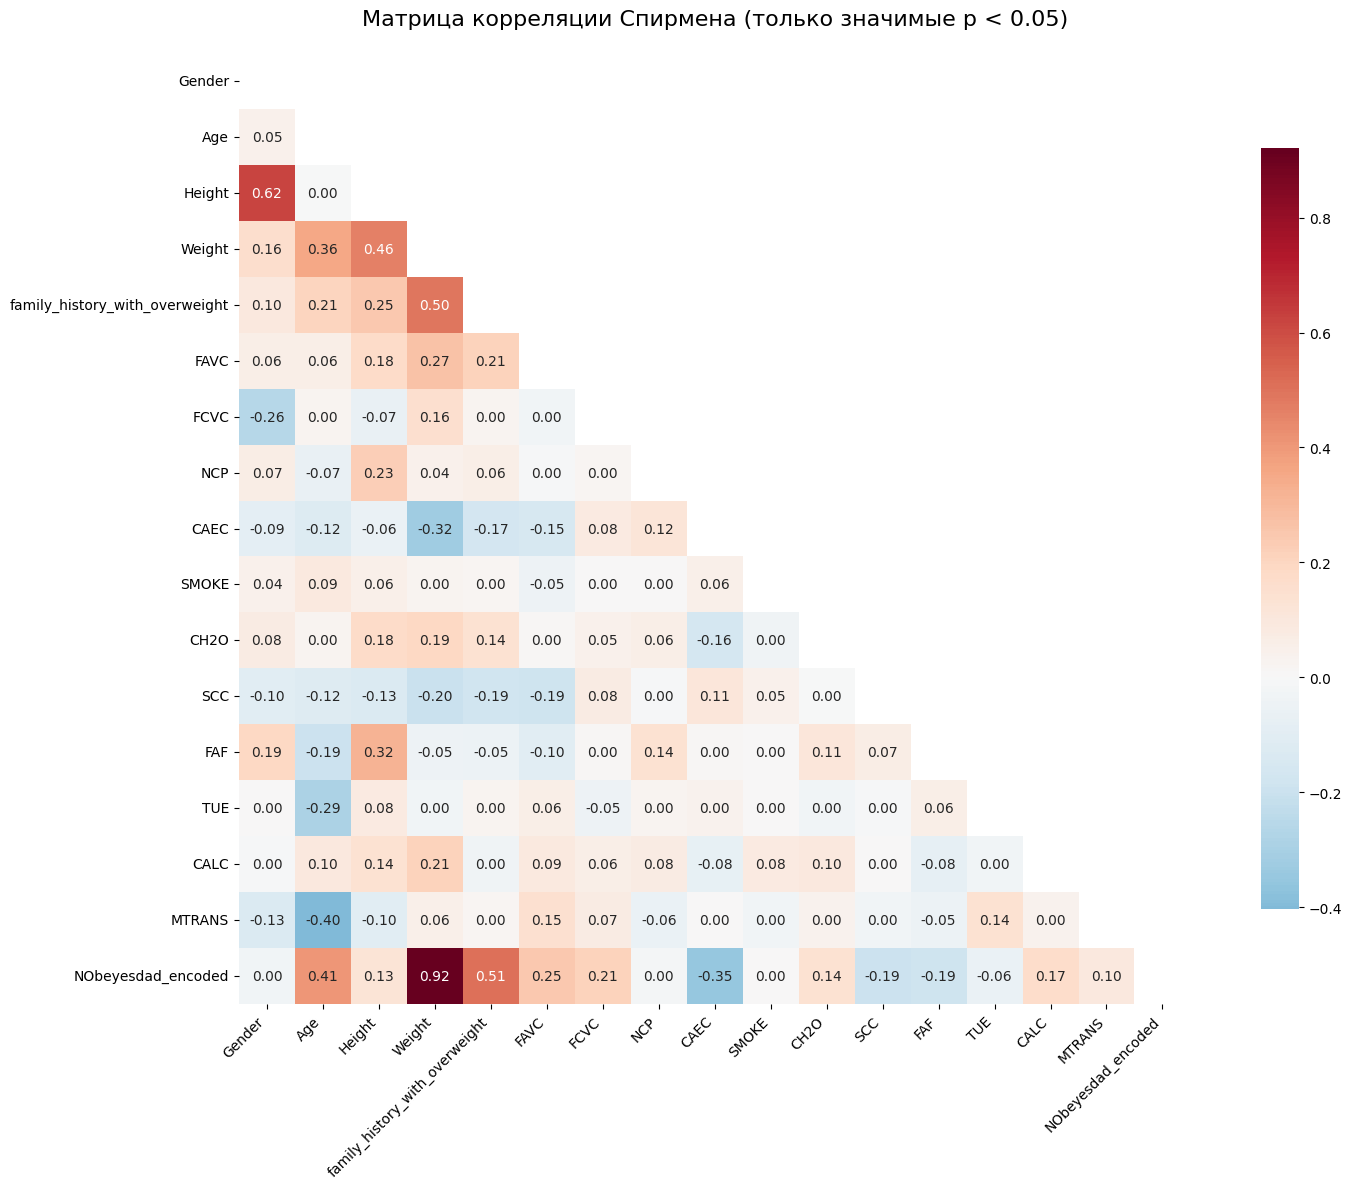

In [ ]:
def advanced_correlation_matrix(df):
    """Создает расширенную матрицу корреляции с разными методами"""
    
    # Выбираем только числовые и преобразованные колонки
    numeric_df = df.select_dtypes(include=[np.number])
    columns = numeric_df.columns
    n = len(columns)
    
    # Создаем матрицу
    corr_matrix = np.zeros((n, n))
    pvalue_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            if i == j:
                corr_matrix[i, j] = 1.0
                pvalue_matrix[i, j] = 0.0
            else:
                # Для бинарных переменных используем point-biserial корреляцию
                if numeric_df[columns[i]].nunique() == 2 or numeric_df[columns[j]].nunique() == 2:
                    corr, pval = pointbiserialr(numeric_df[columns[i]], numeric_df[columns[j]])
                else:
                    # Для остальных - Спирмена (более устойчив к нелинейностям)
                    corr, pval = spearmanr(numeric_df[columns[i]], numeric_df[columns[j]])
                
                corr_matrix[i, j] = corr
                pvalue_matrix[i, j] = pval
    
    return pd.DataFrame(corr_matrix, index=columns, columns=columns), \
           pd.DataFrame(pvalue_matrix, index=columns, columns=columns)

# Строим расширенную матрицу корреляции
corr_spearman, pvalues = advanced_correlation_matrix(df)

# Визуализируем
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr_spearman, dtype=bool))

# Подписываем только значимые корреляции (p < 0.05)
annot_matrix = corr_spearman.copy()
for i in range(len(annot_matrix)):
    for j in range(len(annot_matrix)):
        if pvalues.iloc[i, j] > 0.05:
            annot_matrix.iloc[i, j] = 0  # или можно оставить пустым

sns.heatmap(corr_spearman, 
            mask=mask,
            annot=annot_matrix,  # Показываем только значимые
            fmt=".2f", 
            cmap='RdBu_r', 
            center=0,
            square=True,
            cbar_kws={"shrink": .8})

plt.title('Матрица корреляции Спирмена (только значимые p < 0.05)', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

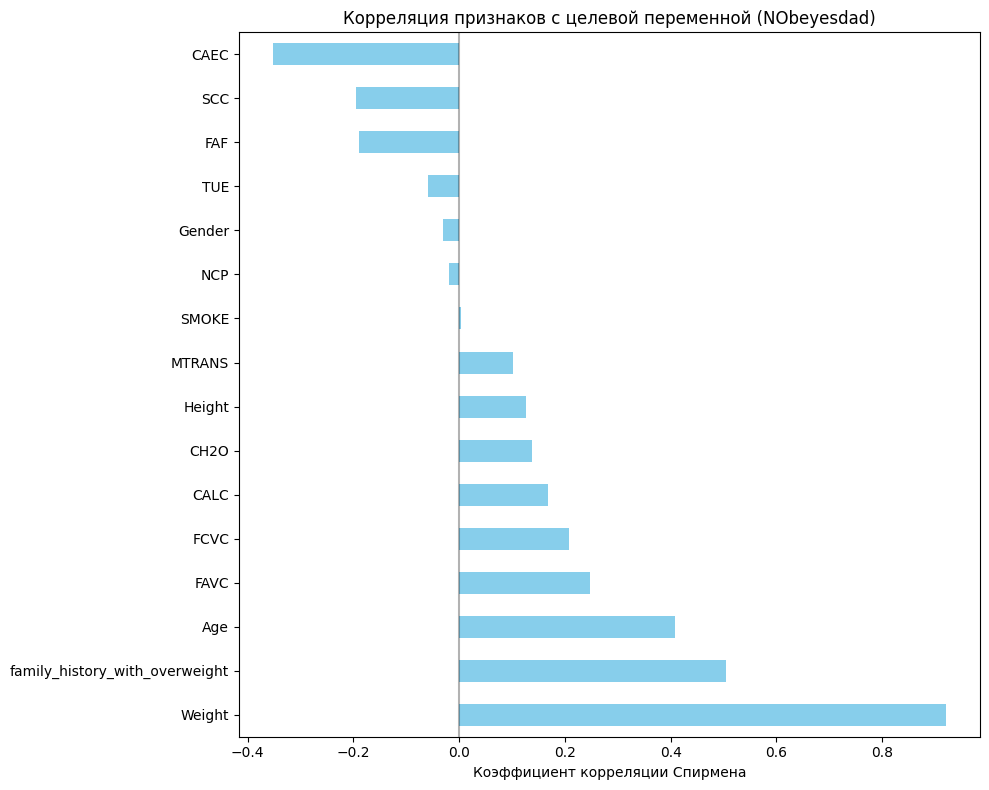

Топ положительных корреляций с ожирением:
NObeyesdad_encoded                1.000000
Weight                            0.921320
family_history_with_overweight    0.505148
Age                               0.408760
FAVC                              0.247793
FCVC                              0.207816
CALC                              0.168379
CH2O                              0.137553
Height                            0.126830
MTRANS                            0.102542
Name: NObeyesdad_encoded, dtype: float64

Топ отрицательных корреляций с ожирением:
NCP      -0.018456
Gender   -0.031464
TUE      -0.059823
FAF      -0.190270
SCC      -0.194508
CAEC     -0.352752
Name: NObeyesdad_encoded, dtype: float64


In [ ]:
# Фокусируемся на корреляциях с целевой переменной
target_correlations = corr_spearman['NObeyesdad_encoded'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
target_correlations.drop('NObeyesdad_encoded').plot(kind='barh', color='skyblue')
plt.title('Корреляция признаков с целевой переменной (NObeyesdad)')
plt.xlabel('Коэффициент корреляции Спирмена')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

# Выводим топ корреляций
print("Топ положительных корреляций с ожирением:")
print(target_correlations[target_correlations > 0].head(10))
print("\nТоп отрицательных корреляций с ожирением:")
print(target_correlations[target_correlations < 0].head(10))